In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline,FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("emlak.csv")
df.head()

,City,Town,Neighborhood,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
0,Ankara,Mamak,Akşemsettin,Daire,3,125.0,3 + 1,Ara Kat,True,2.0,İkinci El,Kombi,Doğalgaz,16000
1,Adana,Seyhan,Yeşilyurt,Daire,5,140.0,3 + 1,13. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,15500
2,İstanbul,Beşiktaş,Nisbetiye,Residence,0,360.0,4 + 1,21 ve üzeri,False,3.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
3,İstanbul,Beşiktaş,Nisbetiye,Residence,0,350.0,4 + 1,Ara Kat,False,4.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,350000
4,İstanbul,Şişli,Fulya,Daire,15,90.0,1 + 1,5. Kat,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,60000


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House Age,8747.0,15.518806,13.232661,0.0,5.0,13.0,25.0,220.0
House Size,8747.0,129.453061,78.287357,1.0,85.0,115.0,150.0,980.0
Bathroom Count,8747.0,1.397050,0.795888,1.0,1.0,1.0,2.0,22.0
Price,8747.0,59752.988568,625937.611485,1.0,14000.0,20000.0,30000.0,40000000.0


In [149]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1    
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

lower_bound,upper_bound

(-10000.0, 54000.0)

In [150]:
df = df[~(df['Price']<10000)]

In [151]:
df.groupby("Furniture")["Price"].value_counts()

Furniture  Price   
False      15000       429
           20000       332
           25000       253
           10000       199
           18000       194
                      ... 
True       4200000       1
           5600000       1
           8000000       1
           12000000      1
           40000000      1
Name: count, Length: 541, dtype: int64

In [152]:
df['Floor'].unique()

array(['Ara Kat', '13. Kat', '21 ve üzeri', '5. Kat', '10. Kat',
       'Müstakil', '4. Kat', 'En Üst Kat', 'Bahçe Katı', 'Yüksek Giriş',
       '3. Kat', '7. Kat', '1. Kat', '2. Kat', '14. Kat', '18. Kat',
       '16. Kat', '8. Kat', '15. Kat', '17. Kat', '19. Kat', 'Kot 1',
       'Kot 2', 'Giriş Katı', 'Zemin', '6. Kat', '9. Kat', 'Teras Katı',
       'Kot 3', nan, 'Çatı Katı', '12. Kat', '11. Kat', 'Villa Katı',
       'Bodrum', 'Yarı Bodrum', '20. Kat', 'Bodrum ve Zemin', 'Tripleks',
       'Asma Kat'], dtype=object)

In [153]:
df.isnull().sum()

City                 0
Town                 0
Neighborhood         0
House Type           0
House Age            0
House Size           0
Room Count           0
Floor               18
Furniture          322
Bathroom Count       0
Hand              1436
Heater Type          0
Heater Fuel         53
Price                0
dtype: int64

In [154]:
df.isnull().sum()

City                 0
Town                 0
Neighborhood         0
House Type           0
House Age            0
House Size           0
Room Count           0
Floor               18
Furniture          322
Bathroom Count       0
Hand              1436
Heater Type          0
Heater Fuel         53
Price                0
dtype: int64

In [155]:
ct = pd.crosstab(df['Floor'],df['House Type'])
ct

House Type,Bina,Daire,Dağ Evi,Köy Evi,Köşk,Loft Daire,Müstakil Ev,Prefabrik,Residence,Villa,Yalı,Yalı Dairesi,Yazlık
Floor,,,,,,,,,,,,,
1. Kat,0,891,1,0,0,0,0,0,10,4,0,1,4
10. Kat,0,54,0,0,0,0,0,0,8,0,0,0,1
11. Kat,0,51,0,0,0,0,0,0,3,0,0,0,0
12. Kat,0,41,0,0,0,0,0,0,4,0,0,0,0
13. Kat,0,36,0,0,0,0,0,0,4,0,0,0,0
14. Kat,0,35,0,0,0,0,0,0,8,0,0,0,0
15. Kat,0,12,0,0,0,0,0,0,8,0,0,0,0
16. Kat,0,7,0,0,0,0,0,0,8,0,0,0,0
17. Kat,0,9,0,0,0,0,0,0,5,0,0,0,0


In [156]:
df.loc[(df['Floor'].isnull()) & (df['House Type'] != "Bina") & (df['House Type'] != "Daire"),"Floor"] = "Müstakil"

In [157]:
len(df)

8040

In [158]:
cc =df.loc[~((df['House Type'] == 'Daire') & (df['Floor'].isnull()))]
len(cc)


8038

In [159]:
df[df['Floor'].isnull()]

,City,Town,Neighborhood,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
216,Muğla,Bodrum,Bahçelievler,Daire,0,65.0,2 + 1,NaN,False,2.0,Sıfır,Merkezi,Doğalgaz,80000
593,İstanbul,Arnavutköy,Tayakadın,Bina,25,160.0,6 + 2,NaN,False,2.0,İkinci El,Kombi,Doğalgaz,200000
845,Ankara,Keçiören,Aşağı Eğlence,Bina,35,130.0,3 + 1,NaN,False,1.0,İkinci El,Kombi,Doğalgaz,17000
1604,İzmir,Karabağlar,Cennetoğlu,Bina,30,100.0,5 + 2,NaN,False,3.0,İkinci El,Kombi,Doğalgaz,30000
1776,İstanbul,Beyoğlu,Hüseyinağa,Bina,20,400.0,7 + 1,NaN,True,7.0,İkinci El,Kombi,Doğalgaz,130000
2352,Kayseri,Melikgazi,Altınoluk,Bina,10,120.0,3 + 1,NaN,False,1.0,NaN,Merkezi,Doğalgaz,15000
2353,Kayseri,Melikgazi,Altınoluk,Bina,10,120.0,3 + 1,NaN,False,1.0,NaN,Merkezi,Doğalgaz,15000
2454,Ankara,Mamak,Diriliş,Bina,5,85.0,2 + 1,NaN,True,1.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,18000
3091,İstanbul,Şişli,Merkez,Bina,0,70.0,1 + 1,NaN,True,1.0,Sıfır,Kombi,Doğalgaz,400000
3367,İstanbul,Beyoğlu,Pürtelaş Hasan Efendi,Bina,14,630.0,6 + 2,NaN,True,4.0,İkinci El,Kombi,Doğalgaz,320000


<Axes: xlabel='Furniture', ylabel='count'>

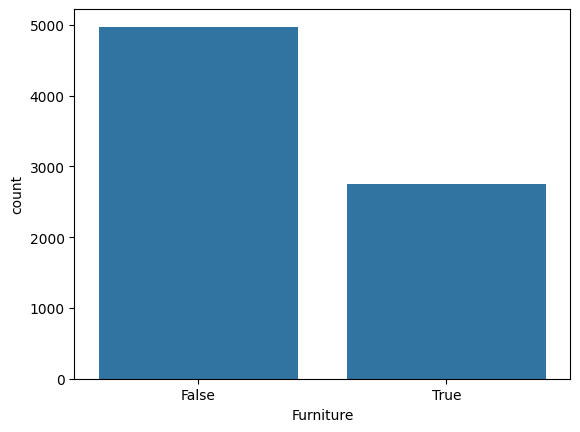

In [160]:
sns.countplot(data=df,x=df['Furniture'])

In [161]:
#Because of the room count
df.loc[df['Bathroom Count'].isnull(),'Bathroom Count'] = 1

In [162]:
df[df['Hand'].isnull()]

,City,Town,Neighborhood,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
9,İstanbul,Beşiktaş,Etiler,Villa,27,500.0,5 + 1,Müstakil,True,4.0,NaN,Kombi,Doğalgaz,500000
11,İzmir,Seferihisar,Hıdırlık,Müstakil Ev,11,350.0,4 + 1,Bahçe Katı,False,3.0,NaN,Kombi,Doğalgaz,37000
13,İzmir,Çeşme,Yalı,Villa,5,250.0,2 + 1,Bahçe Katı,True,2.0,NaN,Klima,Elektrik,270000
14,İzmir,Çeşme,Dalyan,Daire,1,65.0,1 + 1,Yüksek Giriş,True,1.0,NaN,Klima,Elektrik,22000
19,İstanbul,Sarıyer,Maslak,Daire,4,165.0,2 + 1,3. Kat,True,3.0,NaN,Merkezi,Doğalgaz,75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,İzmir,Konak,Kahramanlar,Daire,20,110.0,2 + 1,3. Kat,False,1.0,NaN,Klima,Elektrik,16000
8711,İstanbul,Silivri,Ortaköy,Villa,11,500.0,6 + 1,Bahçe Katı,True,3.0,NaN,Yerden Isıtma,Doğalgaz,550000
8720,İstanbul,Beşiktaş,Muradiye,Daire,5,220.0,4 + 1,Bahçe Katı,True,1.0,NaN,Kombi,Doğalgaz,55000
8724,İstanbul,Avcılar,Denizköşkler,Daire,13,85.0,2 + 1,4. Kat,False,1.0,NaN,Kombi,Doğalgaz,14000


In [163]:
crostab = pd.crosstab(df['Hand'].fillna("Unknown"),df['House Age'])
crostab

House Age,0,1,2,3,4,5,6,7,8,9,...,74,75,80,90,95,100,115,150,200,220
Hand,,,,,,,,,,,,,,,,,,,,,
Betonarme,0,1,0,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
Sıfır,925,134,62,41,30,36,12,9,12,0,...,0,0,0,0,1,0,0,0,0,0
Unknown,0,55,57,60,88,268,19,20,21,11,...,0,0,0,0,0,1,0,0,0,0
İkinci El,0,53,87,105,175,276,123,167,176,84,...,1,2,1,1,0,6,1,1,1,1


In [164]:
df.groupby('Hand')['House Age'].size()

Hand
Betonarme      13
Sıfır        1342
İkinci El    5249
Name: House Age, dtype: int64

In [165]:
df['House Age'] = df['House Age'].replace('Sıfır',0)
df.loc[df['House Age'] == 0,'Hand'] = 'Sıfır'


In [166]:
df.loc[(df['House Type']=="Daire") &(df['Price']>100000)]

,City,Town,Neighborhood,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
18,İstanbul,Kadıköy,Caddebostan,Daire,5,180.0,4 + 1,Yüksek Giriş,False,3.0,İkinci El,Kombi,Doğalgaz,165000
50,İstanbul,Beşiktaş,Vişnezade,Daire,5,145.0,1 + 1,Ara Kat,True,2.0,İkinci El,Merkezi (Pay Ölçer),Doğalgaz,120000
54,İstanbul,Beşiktaş,Levazım,Daire,10,171.0,2 + 1,15. Kat,False,2.0,İkinci El,VRV,Doğalgaz,220000
72,İstanbul,Beşiktaş,Akat,Daire,31,180.0,3 + 1,5. Kat,NaN,2.0,İkinci El,Merkezi,Doğalgaz,129000
86,İstanbul,Beşiktaş,Nisbetiye,Daire,0,650.0,7 + 1,21 ve üzeri,False,6.0,Sıfır,Merkezi (Pay Ölçer),Doğalgaz,650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8578,Adana,Seyhan,Gürselpaşa,Daire,10,240.0,4 + 1,2. Kat,False,2.0,İkinci El,Kombi,Doğalgaz,360000
8662,Ankara,Çankaya,Oran,Daire,11,216.0,4 + 1,14. Kat,True,2.0,NaN,Merkezi (Pay Ölçer),Doğalgaz,110000
8670,İstanbul,Beşiktaş,Kuruçeşme,Daire,28,350.0,8 + 1,Villa Katı,NaN,2.0,NaN,Kombi,Doğalgaz,270000
8695,Hatay,Arsuz,Karaağaç Konarlı,Daire,5,220.0,3 + 1,Zemin,True,2.0,İkinci El,Kombi,Doğalgaz,400000


<Axes: xlabel='Hand', ylabel='count'>

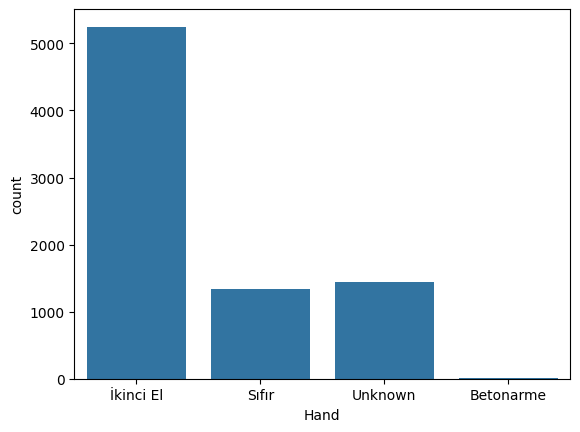

In [167]:
sns.countplot(data=df,x=df['Hand'].fillna('Unknown'))

<Axes: ylabel='Price'>

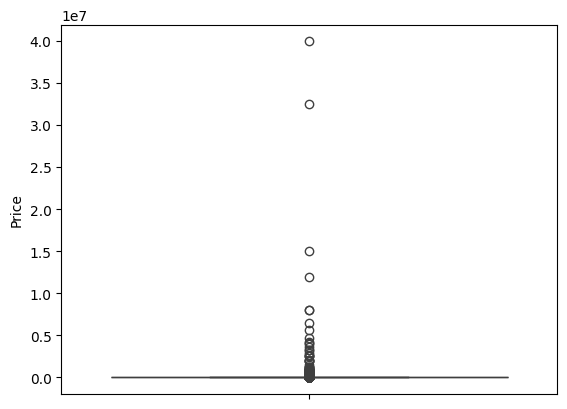

In [168]:
sns.boxplot(data=df,y="Price")

In [169]:
df["Heater Fuel"] = df["Heater Fuel"].replace("Kömür-Odun","Kömür")
df['Heater Type'] = df["Heater Type"].replace("Merkezi (Pay Ölçer)","Merkezi")
df['Floor'] = df['Floor'].apply(lambda x: 'Bodrum' if isinstance(x,str) and 'Bodrum' in x else x)
df["Floor"] = df["Floor"].replace("En Üst Kat","Çatı Katı")
df["House Type"] = df["House Type"].replace("Yalı Dairesi","Yalı")

In [170]:
def remove_outlier(df):
    Q1 = df["Price"].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return lower_bound,upper_bound

In [171]:

lower_bound,upper_bound = remove_outlier(df)
df = df.loc[~((df['Price']<lower_bound)|(df['Price']>upper_bound))]


<Axes: ylabel='Price'>

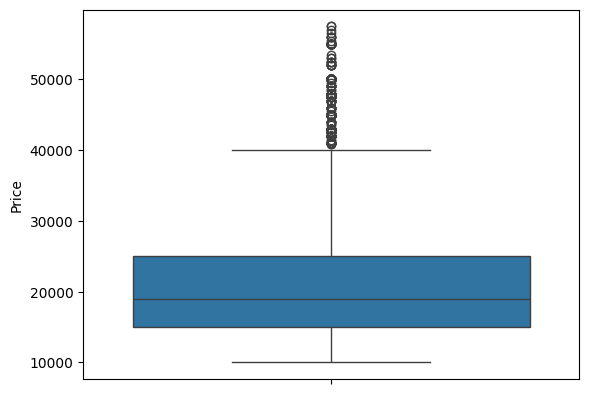

In [172]:
sns.boxplot(data=df.loc[~((df['Price']<lower_bound)|(df['Price']>upper_bound))],y="Price")

In [173]:
df.loc[df['Heater Type'] == "Belirtilmemiş",'Heater Type'] = np.nan

In [174]:
ctab = pd.crosstab(df['Heater Type'],df['Heater Fuel'].fillna('Unknown'))
ctab

Heater Fuel,Akaryakıt,Doğalgaz,Elektrik,Kömür,Unknown
Heater Type,,,,,
Doğalgaz Sobası,0,27,1,0,0
Fancoil Ünitesi,0,1,3,0,7
Güneş Enerjisi,0,2,25,0,0
Isı Pompası,0,1,2,0,0
Isıtma Yok,0,1,101,3,0
Jeotermal Isıtma,0,3,2,0,20
Kat Kaloriferi,4,34,4,7,0
Klima,1,30,932,7,0
Kombi,1,4341,16,2,0


In [175]:
df.loc[df['Heater Type'].isnull() & (df['Heater Fuel'] == 'Elektrik'),'Heater Type'] = "Klima"
df.loc[df['Heater Type'].isnull() & (df['Heater Fuel'] == 'Doğalgaz'),'Heater Type'] = "Kombi"

In [176]:
df = df[df['Heater Type'].notnull()]

In [177]:
df[df['Heater Fuel'].isnull()]

,City,Town,Neighborhood,House Type,House Age,House Size,Room Count,Floor,Furniture,Bathroom Count,Hand,Heater Type,Heater Fuel,Price
90,Ankara,Çankaya,Çukurambar,Residence,0,85.0,1 + 1,3. Kat,NaN,1.0,Sıfır,Fancoil Ünitesi,NaN,35000
934,İzmir,Balçova,Onur,Daire,6,60.0,1 + 1,2. Kat,False,1.0,İkinci El,Jeotermal Isıtma,NaN,20000
1246,İzmir,Balçova,Fevzi Çakmak,Daire,30,125.0,3 + 1,4. Kat,True,1.0,İkinci El,Jeotermal Isıtma,NaN,25000
1516,İzmir,Balçova,Korutürk,Daire,28,120.0,3 + 1,7. Kat,False,1.0,İkinci El,Jeotermal Isıtma,NaN,30000
1789,İzmir,Balçova,Fevzi Çakmak,Daire,30,130.0,3 + 1,3. Kat,True,1.0,İkinci El,Jeotermal Isıtma,NaN,30000
1857,İzmir,Balçova,Onur,Daire,28,100.0,3 + 1,Çatı Katı,True,1.0,NaN,Jeotermal Isıtma,NaN,17500
1969,İzmir,Balçova,Fevzi Çakmak,Daire,28,180.0,3 + 1,Yüksek Giriş,True,2.0,İkinci El,Jeotermal Isıtma,NaN,30000
2265,Balıkesir,Edremit,Soğanyemez,Daire,24,120.0,3 + 1,3. Kat,False,1.0,NaN,Jeotermal Isıtma,NaN,16000
2932,İzmir,Balçova,Teleferik,Daire,26,100.0,2 + 1,2. Kat,False,1.0,İkinci El,Jeotermal Isıtma,NaN,22500
2977,İzmir,Balçova,Teleferik,Daire,25,101.0,2 + 1,1. Kat,False,1.0,İkinci El,Jeotermal Isıtma,NaN,21000


In [178]:
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Kombi'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Merkezi'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Klima'),'Heater Fuel'] = "Elektrik"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Merkezi'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Soba'),'Heater Fuel'] = "Kömür"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Isıtma Yok'),'Heater Fuel'] = "Elektrik"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Doğalgaz Sobası'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Güneş Enerjisi'),'Heater Fuel'] = "Elektrik"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Yerden Isıtma'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Kat Kaloriferi'),'Heater Fuel'] = "Doğalgaz"
df.loc[df['Heater Fuel'].isnull() & (df['Heater Type'] == 'Isı Pompası'),'Heater Fuel'] = "Doğalgaz"

In [179]:
df['House Age'] = pd.to_numeric(df['House Age'],errors='coerce')

In [180]:
df= df.loc[~((df["Price"]>100000) & (df["House Type"] =="Daire") & (df["House Size"] < 100))]

In [181]:
value_counts = df['Floor'].value_counts()
df = df[df['Floor'].isin(value_counts[value_counts >= 5].index)]

In [182]:
value_counts = df['Heater Type'].value_counts()
df = df[df['Heater Type'].isin(value_counts[value_counts >= 5].index)]

value_counts = df['Heater Fuel'].value_counts()
df = df[df['Heater Fuel'].isin(value_counts[value_counts >= 5].index)]

In [183]:
df.dtypes

City               object
Town               object
Neighborhood       object
House Type         object
House Age           int64
House Size        float64
Room Count         object
Floor              object
Furniture          object
Bathroom Count    float64
Hand               object
Heater Type        object
Heater Fuel        object
Price               int64
dtype: object

In [184]:
df['Price'].describe().T

count     6976.000000
mean     21579.279960
std       9887.053161
min      10000.000000
25%      14999.000000
50%      19000.000000
75%      25000.000000
max      57500.000000
Name: Price, dtype: float64

In [185]:
df = df.loc[~(df['Price'] > 400000)]

In [186]:
df[["Bedroom Count","Hall Count"]] = df['Room Count'].str.split("+",expand=True).astype('int')
df = df.drop("Room Count",axis=1)

In [187]:
missing_cat_col = [col for col in df.select_dtypes('O').columns if df[col].isnull().any()]
num_cols = df.select_dtypes(["float64","int64"]).columns[:-1].tolist()
only_2_unique_val = [col for col in df.select_dtypes('O').columns if len(df[col].unique()) <= 2]
only_2_unique_val
cat_cols = df.select_dtypes('O').columns

In [188]:
num_transformer = Pipeline(steps=[
    ("impute_mean",SimpleImputer(strategy="mean")),
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("impute_most_frequent",SimpleImputer(strategy="most_frequent")),
    ("encoding",OneHotEncoder(handle_unknown="ignore")),
])

In [189]:
preprocessing_pipeline = ColumnTransformer(
    transformers=[
    ('categorical',cat_transformer,cat_cols),
    ('numerical',num_transformer,num_cols),
])

In [190]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House Age,6976.0,16.118693,13.199890,0.0,5.0,15.0,25.0,200.0
House Size,6976.0,118.383117,51.853123,1.0,85.0,110.0,140.0,725.0
Bathroom Count,6976.0,1.268492,0.528759,1.0,1.0,1.0,1.0,11.0
Price,6976.0,21579.279960,9887.053161,10000.0,14999.0,19000.0,25000.0,57500.0
Bedroom Count,6976.0,2.409404,1.071945,1.0,2.0,2.0,3.0,41.0
Hall Count,6976.0,1.008171,0.188004,0.0,1.0,1.0,1.0,6.0


In [191]:
df.select_dtypes('O')

,City,Town,Neighborhood,House Type,Floor,Furniture,Hand,Heater Type,Heater Fuel
0,Ankara,Mamak,Akşemsettin,Daire,Ara Kat,True,İkinci El,Kombi,Doğalgaz
1,Adana,Seyhan,Yeşilyurt,Daire,13. Kat,False,İkinci El,Kombi,Doğalgaz
7,İstanbul,Şişli,Fulya,Daire,4. Kat,True,İkinci El,Kombi,Doğalgaz
8,Antalya,Alanya,Mahmutlar,Daire,Çatı Katı,False,İkinci El,Klima,Elektrik
10,İstanbul,Bahçelievler,Yenibosna Merkez,Daire,5. Kat,False,İkinci El,Kombi,Doğalgaz
...,...,...,...,...,...,...,...,...,...
8740,Antalya,Manavgat,Mimar Sinan,Daire,Çatı Katı,False,İkinci El,Klima,Elektrik
8743,Antalya,Alanya,Mahmutlar,Daire,2. Kat,False,NaN,Klima,Elektrik
8744,Isparta,Merkez,Çünür,Daire,Çatı Katı,False,İkinci El,Kombi,Doğalgaz
8745,Kocaeli,Darıca,Nenehatun,Daire,Çatı Katı,False,Sıfır,Kombi,Doğalgaz


In [192]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline(steps=[
    ('preprocessing',preprocessing_pipeline),
    ('model',CatBoostRegressor(verbose=0))
])

In [193]:

df = df.loc[~(df['Price']<lower_bound) | (df['Price'] > upper_bound)]

In [194]:
df = df[~(df['Price'] > 40000)]

In [201]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold

y = df['Price']
X = df.drop('Price', axis=1)


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')

cv_scores = -cv_scores

for i, score in enumerate(cv_scores):
    print(f"Fold {i + 1} score: {score:.2f}")

print("---" * 8)

# Print average RMSE score and standard deviation
print(f"Ortalama RMSE Skoru: {cv_scores.mean():.2f}")
print(f"Standart Sapma: {cv_scores.std():.2f}")


Fold 1 score: 4602.07
Fold 2 score: 5016.15
Fold 3 score: 4557.61
Fold 4 score: 4843.13
Fold 5 score: 4715.77
------------------------
Ortalama RMSE Skoru: 4746.95
Standart Sapma: 167.05


In [196]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('impute_most_frequent',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['City', 'Town', 'Neighborhood', 'House Type', 'Floor', 'Furniture',
       'Hand', 'Heater Type', 'Heater Fuel'],
      dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['House Age', 'House Size',
                                                   'Bathroom Count'])])),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001524168F6A0>)])

In [197]:
y_train.max()

40000

In [202]:
# Summary statistics for the 'Price' column
price_summary = df['Price'].describe()

# Range of prices
price_range = price_summary['max'] - price_summary['min']

# Mean of prices
mean_price = price_summary['mean']

# Standard deviation of prices
std_price = price_summary['std']

# RMSE as a percentage of mean price
rmse_percentage = (4746 / mean_price) * 100

price_summary, price_range, mean_price, std_price, rmse_percentage


(count     6545.000000
 mean     19861.813140
 std       7433.023811
 min      10000.000000
 25%      14200.000000
 50%      18000.000000
 75%      25000.000000
 max      40000.000000
 Name: Price, dtype: float64,
 30000.0,
 19861.813139801376,
 7433.0238111723875,
 23.895099438275462)

In [198]:
y_pred = model_pipeline.predict(X_test)

results = pd.DataFrame(data={"Test":y_test.values,"Pred":y_pred})

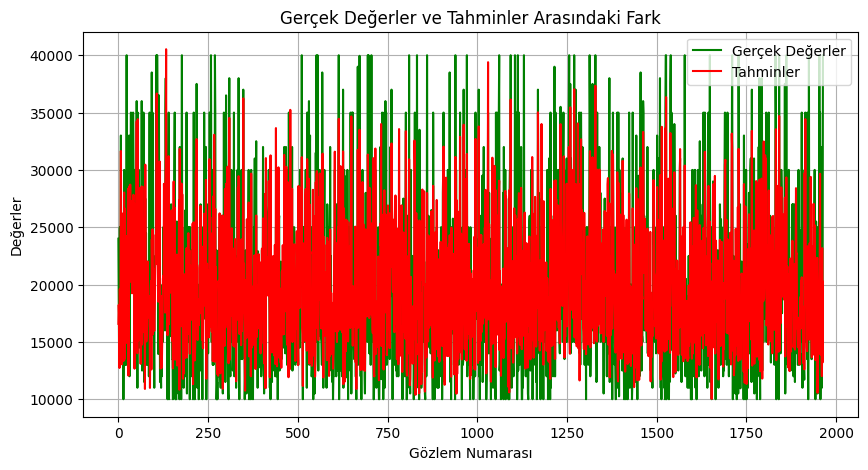

In [199]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(results)), y="Test", data=results, color="green", label='Gerçek Değerler')
sns.lineplot(x=range(len(results)), y="Pred", data=results, color="red", label='Tahminler')

plt.title('Gerçek Değerler ve Tahminler Arasındaki Fark')
plt.xlabel('Gözlem Numarası')
plt.ylabel('Değerler')
plt.legend()
plt.grid(True)
plt.show()

In [200]:
import joblib 
joblib_file = "model_pipeline.pkl"
joblib.dump(model_pipeline, joblib_file)

print(f"Model pipeline saved to {joblib_file}")

Model pipeline saved to model_pipeline.pkl
